# Churn prediction with multilayer perceptron model (MLP)

## Introduction

### Customer churn

**Customer churn** is when a customer decides to stop using services, content, or products from a company. Reasons for customer churn can be various anf the most typical one are poor customer service, not finding enough value in a product or service, lack of customer loyalty and lack of communications.

### Data

I am using Telco customer churn dataset, which I downloaded from [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California. It indicates which customers have left, stayed, or signed up for their service.

**Attribute information:**

* customerID - Customer ID
* gender - Whether the customer is a male or a female
* SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
* Partner - Whether the customer has a partner or not (Yes, No)
* Dependents - Whether the customer has dependents or not (Yes, No)
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not (Yes, No)
* MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract - The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - The amount charged to the customer monthly
* TotalCharges - The total amount charged to the customer
* Churn - Whether the customer churned or not (Yes or No)

## Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory data analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* There is potentially a problem with data types. Some variables like *TotalCharges* may have integer or float data type instead of object
* It would be useful to change all boolean values from 'Yes', 'No' to 1 and 0, respectively

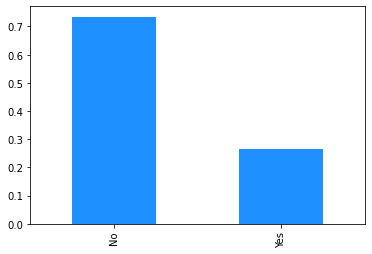

In [5]:
df['Churn'].value_counts(normalize=True).plot.bar(color='dodgerblue');

Churn rate is quite high and it is a bit low than 30%.

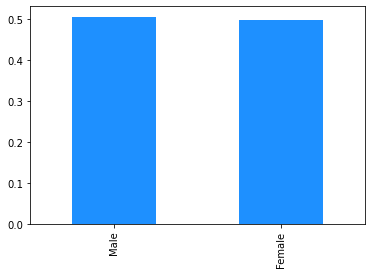

In [6]:
df['gender'].value_counts(normalize=True).plot.bar(color='dodgerblue');

We have alomost equal gender distribution in the dataset

In [7]:
df['TotalCharges'][:20]

0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
Name: TotalCharges, dtype: object

It seems that *TotalChargeas* should have float data type instead of object

In [8]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
159.2       1
7173.15     1
1755.35     1
539.85      1
399.45      1
Name: TotalCharges, Length: 6531, dtype: int64

In [9]:
null_total_charges = df[df['TotalCharges'] == ' ']

In [10]:
null_total_charges.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [11]:
null_total_charges.shape

(11, 21)

There are 11 rows with empty records for *TotalCahrges*. Let us replace the records with null values

## Data cleaning and transformation

### 1. Target variable encoding

Let us replace yes and no by 1 and 0, respectively

In [12]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
# Let us check the replacement
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
print("Churn rate: ", df[df['Churn'] == 1].shape[0] * 100 / df.shape[0])

Churn rate:  26.536987079369588


### 2. Handle missing values and change the data type for *TotalCharges*

In [15]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [16]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

### 3. Drop Null values

In [17]:
df.dropna(inplace=True)

In [18]:
# Check null values
df.isnull().sum().sum()

0

In [19]:
df.reset_index(inplace=True)

In [20]:
df.drop(columns=['index'], inplace=True)

In [21]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


### 4. Transform continuous variables

In [23]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


As you can see from the summary statistics, the variables are on completely different scales. *tenure* variable ranges from 1 to 72, while *TotalCharges* range from 18.8 to 8,684.8. ANN models typically perform better with scaled or normalized features. Let us normalize the features before training the model.

In [24]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()

In [25]:
df['TotalCharges'] = np.log(df['TotalCharges'])
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean()) / df['TotalCharges'].std()

In [26]:
df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()

In [27]:
pd.options.display.float_format = "{:.5f}".format

After normalizing data, we got the following results for continuous variables

In [28]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.00000,7032.00000,7032.00000
mean,-0.00000,-0.00000,-0.00000
std,1.00000,1.00000,1.00000
min,-1.28016,-1.88227,-2.57906
25%,-0.95423,-0.75837,-0.60806
50%,-0.13941,0.38851,0.19505
75%,0.91986,0.80048,0.83823
max,1.61246,1.26958,1.37132


As you can see from the summary statistics, all the variables have a mean of 0 and a standard deviation of 1.

### 5. One-hot encoding of categorical variables

First of all, let us have a look at the number of unique values in each column

In [29]:
for column in list(df.columns):
    print(column, df[column].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


We have already handled the *tenure*, *MonthlyCharges*, *TotalCharges* columns. Let us focus on on those variables with 2 to 4 unique variables. 

I'll start from taking a look at the distribution for some of the categorical variables.

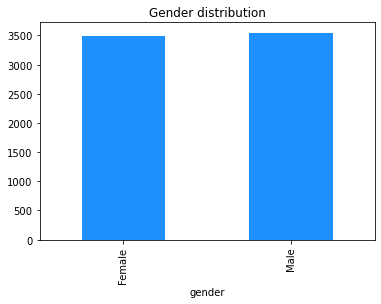

In [30]:
df.groupby('gender').count()['customerID'].plot(kind='bar',
                                                color='dodgerblue',
                                                grid=False,
                                                figsize=(6,4),
                                                title='Gender distribution');

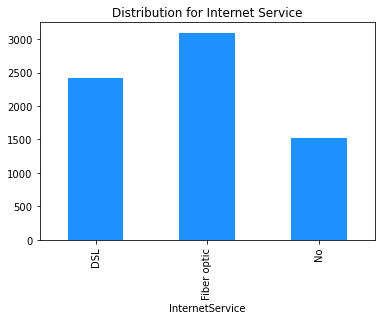

In [31]:
df.groupby('InternetService').count()['customerID'].plot(kind='bar',
                                                         color='dodgerblue',
                                                         grid=False,
                                                         figsize=(6,4),
                                                         title='Distribution for Internet Service');

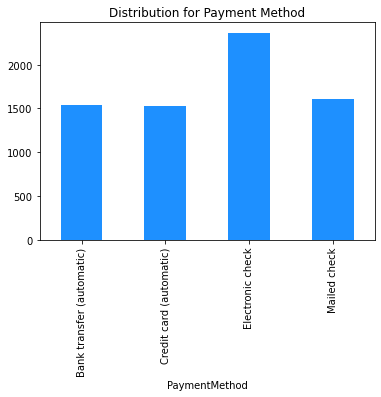

In [32]:
df.groupby('PaymentMethod').count()['customerID'].plot(kind='bar',
                                                       color='dodgerblue',
                                                       grid=False,
                                                       figsize=(6,4),
                                                       title='Distribution for Payment Method');

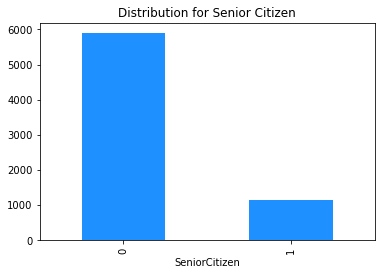

In [33]:
df.groupby('SeniorCitizen').count()['customerID'].plot(kind='bar',
                                                       color='dodgerblue',
                                                       grid=False,
                                                       figsize=(6,4),
                                                       title='Distribution for Senior Citizen');

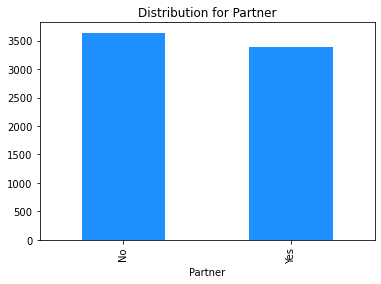

In [34]:
df.groupby('Partner').count()['customerID'].plot(kind='bar',
                                                  color='dodgerblue',
                                                  grid=False,
                                                  figsize=(6,4),
                                                  title='Distribution for Partner');

Let us apply one-hot encoding to transform the catgorical variables.

In [35]:
# Converting boolean variables to a format for further use
df['SeniorCitizen'].loc[df.SeniorCitizen == 1] = 'Yes';
df['SeniorCitizen'].loc[df.SeniorCitizen == 0] = 'No';

/Users/aigerimshopenova/opt/anaconda3/envs/dsnd/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [36]:
df_trans = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)

for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+ '_' + str(x) for x in dummy_vars.columns]        
        df_trans = pd.concat([df_trans, dummy_vars], axis=1)

In [37]:
df_trans.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.28016,-1.05424,-2.28138,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.06430,0.03290,0.38927,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.23942,-0.06130,-1.45252,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.51245,-0.46758,0.37244,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.23942,0.39686,-1.23486,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [38]:
df_trans.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One yea

In [39]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   float64
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_No                         7032 non-null   uint8  
 7   SeniorCitizen_Yes                        7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

## Artifical neural networks (ANN) with Keras

ANN model is a machine learning model that is inspired by how a human brain functions. 

In this notebook, we will be experimenting with a **multilayer perception model (MLP)**. The MLP model is a model that has at least one or more hidden layers of nodes including one layer for the input and another layer for the output. The MLP model contains at least three or more layers of nodes.

### Building the model

In [64]:
# import packages
from keras.models import Sequential
from keras.layers import Dense

In [65]:
# define target variable and features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

In [66]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [67]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_trans[features], 
                                                    df_trans[target], 
                                                    test_size=0.2,
                                                   random_state=23)

In [82]:
%%time
history = model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
5625/5625 [==============================] - 0s 10us/step - loss: 0.3882 - accuracy: 0.8164
Epoch 2/50
5625/5625 [==============================] - 0s 10us/step - loss: 0.3875 - accuracy: 0.8151
Epoch 3/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3873 - accuracy: 0.8172
Epoch 4/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3862 - accuracy: 0.8187
Epoch 5/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3863 - accuracy: 0.8171
Epoch 6/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3859 - accuracy: 0.8176
Epoch 7/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3848 - accuracy: 0.8190
Epoch 8/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3846 - accuracy: 0.8194
Epoch 9/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3841 - accuracy: 0.8194
Epoch 10/50
5625/5625 [==============================] - 0s 8us/step - loss: 0.3

In [83]:
history.history

{'loss': [0.3882476145691342,
  0.3875336705313788,
  0.3872769824663798,
  0.38618973520067,
  0.38625191979938084,
  0.3859119902716743,
  0.3847985507382287,
  0.38455735206604,
  0.3841374721792009,
  0.38365710179011026,
  0.3841283909479777,
  0.3836520539389716,
  0.38351332518789505,
  0.38318199343151516,
  0.3827754698859321,
  0.38296913425127665,
  0.3828735121091207,
  0.3821508944034576,
  0.38222205691867406,
  0.38188931200239395,
  0.38255432022942437,
  0.3818353884749942,
  0.38159715625974866,
  0.38077902370029026,
  0.3807082912656996,
  0.3817284348275926,
  0.3804856805006663,
  0.38012789143456355,
  0.3806788889567057,
  0.3808009539710151,
  0.3801048493385315,
  0.37965582370758055,
  0.37997567150327893,
  0.37975478556421066,
  0.3790053900082906,
  0.37837432079845007,
  0.37810136146015594,
  0.37837448093626236,
  0.3781735478507148,
  0.3771458260218302,
  0.3773315793938107,
  0.3773822013537089,
  0.37795207381248475,
  0.37757177220450505,
  0.37704

As you can see from the output, loss typically decreases and the accuracy (acc) improves in each epoch. However, the rate of model performance improvement decreases over time.

### Model evaluation

Let us evaluate the model using accuracy, precision, recall, as well as the **receiver operating characteristic (ROC) curve** and **area under the curve (AUC)**.

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [85]:
train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

In [88]:
print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))

print('\n')

print('Precision for test set: %0.4f' % precision_score(y_test, test_set_preds))
print('Precision for train set: %0.4f' % precision_score(y_train, train_set_preds))

print('\n')

print('Recall for test set: %0.4f' % recall_score(y_test, test_set_preds))
print('Recall for train set: %0.4f' % recall_score(y_train, train_set_preds))

Accuracy for test set: 0.8109
Accuracy for train set: 0.8272


Precision for test set: 0.6991
Precision for train set: 0.6987


Recall for test set: 0.5674
Recall for train set: 0.6003


The accuracy for train and test sets is similar, which indicates that the model is slightly overfitted and predicts better for the train set. **Precision** (prediction of positive values) is about 0.69, which shows how well the model predicts customers who will churn.

In [100]:
train_preds = [x[0] for x in model.predict(X_train)]
test_preds = [x[0] for x in model.predict(X_test)]

In [101]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)

In [102]:
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for test set: %0.4f' % test_roc_auc)
print('AUC for train set: %0.4f' % train_roc_auc)

AUC for test set: 0.8649
AUC for train set: 0.8774


Let us visualize ROC

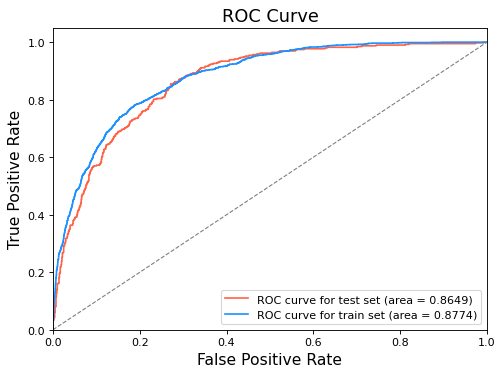

In [116]:
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

AUC for the test set is about 0.87, which is good and it means that the model can predict customers who may churn.

## Summary

* We trained an MLP model and got AUC for the test set=0.87, which can help to predict customers who are planning to churn
* Usually, ANNs take time to train a model, which can be difficult for a real-world situation. Therefore, it is better to start with a benchmark model like logistic regression and then, if a high accuracy is needed to train other more complicated models
* In this notebook, I wanted to see how to predict customer churn with a MLP model.

## Reference

1. Hwang, Y. H. (2019). Hands-on data science for marketing: Improve your marketing strategies with machine learning using Python and R. Birmingham, UK: Packt Publishing.
2. Müller, A. C., & Guido, S. (2018). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O'Reilly Media.